## Two Way ANOVA

A Two Way ANOVA is an extension of the One Way ANOVA. With a One Way, you have one independent variable affecting a dependent variable. With a Two Way ANOVA, there are two independents. Use a two way ANOVA when you have one measurement variable (i.e. a quantitative variable) and two nominal variables. In other words, if your experiment has a quantitative outcome and you have two categorical explanatory variables, a two way ANOVA is appropriate.


For example, you might want to find out if there is an interaction between income and gender for anxiety level at job interviews. The anxiety level is the outcome, or the variable that can be measured. Gender and Income are the two categorical variables. These categorical variables are also the independent variables, which are called factors in a Two Way ANOVA.


The factors can be split into levels. In the above example, income level could be split into three levels: low, middle and high income. Gender could be split into three levels: male, female, and transgender. Treatment groups are all possible combinations of the factors. In this example there would be 3 x 3 = 9 treatment groups.

## Assumptions for Two Way ANOVA

Samples must be independent.

Population variances must be equal.

Groups must have equal sample sizes.


## Steps
It is unlikely you’ll want to do this test by hand, but if you must, these are the steps you’ll want to take:

Find the mean for each of the groups.

Find the overall mean (the mean of the groups combined).

Find the Within Group Variation; the total deviation of each member’s score from the Group Mean.

Find the Between Group Variation: the deviation of each Group Mean from the Overall Mean.

Find the F statistic: the ratio of Between Group Variation to Within Group Variation.


In [1]:
#import libraries

import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [4]:
datafile = "ToothGrowth.csv"
data = pd.read_csv(datafile)

In [4]:
data.head(n=50)

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


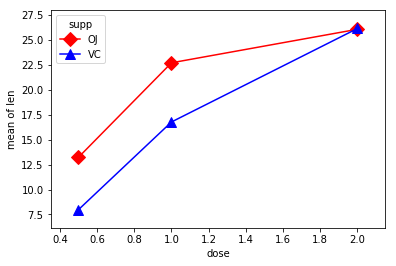

In [5]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [6]:
N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))

In [7]:
grand_mean = data['len'].mean()

In [8]:
ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])

In [11]:
ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])

In [12]:
ssq_t = sum((data.len - grand_mean)**2)

In [13]:
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)

In [14]:
ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

In [15]:
ms_a = ssq_a/df_a

In [16]:
ms_b = ssq_b/df_b

In [17]:
ms_axb = ssq_axb/df_axb

In [18]:
ms_w = ssq_w/df_w

In [19]:
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

In [20]:
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

In [21]:
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
            'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns=['sum_sq', 'df', 'F', 'PR(>F)']
 
aov_table1 = pd.DataFrame(results, columns=columns,
                          index=['supp', 'dose', 
                          'supp:dose', 'Residual'])

In [22]:
aov_table1

,sum_sq,df,F,PR(>F)
supp,205.350000,1,15.572,0.000231183
dose,2426.434333,2,92,4.04629e-18
supp:dose,108.319000,2,4.10699,0.0218603
Residual,712.106000,54,NaN,NaN


MANOVA: https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/anova/#TwoWay
